
## Final Draft


####Importing necessary libraries and printing summary of available datasets
(2 min of installation, then it requires permission to continue)

In [ ]:
!pip install pymatgen       #General materials science package
!pip install matminer       #Machine learning materials science package
# of pandas that was causing some issues
#Display available datasets from matminer
from matminer.datasets import get_available_datasets
get_available_datasets()

Exploring and loading datasets

In [ ]:
from matminer.datasets import load_dataset
from matminer.datasets import get_all_dataset_info

df_DEC = load_dataset("dielectric_constant")
print(df_DEC.describe())
dec_info = get_all_dataset_info("dielectric_constant")
print(dec_info)


            nsites  space_group  ...  poly_electronic   poly_total
count  1056.000000  1056.000000  ...      1056.000000  1056.000000
mean      7.530303   142.970644  ...         7.248049    14.777898
std       3.388443    67.264591  ...        13.054947    19.435303
min       2.000000     1.000000  ...         1.630000     2.080000
25%       5.000000    82.000000  ...         3.130000     7.557500
50%       8.000000   163.000000  ...         4.790000    10.540000
75%       9.000000   194.000000  ...         7.440000    15.482500
max      20.000000   229.000000  ...       256.840000   277.780000

[8 rows x 7 columns]
Dataset: dielectric_constant
Description: 1,056 structures with dielectric properties, calculated with DFPT-PBE.
Columns:
	band_gap: Measure of the conductivity of a material
	cif: optional: Description string for structure
	e_electronic: electronic contribution to dielectric tensor
	e_total: Total dielectric tensor incorporating both electronic and ionic contributions
	fo

Expirementing with the featurization tools in MatMiner 

In [ ]:
from pymatgen.core import Composition
from matminer.featurizers.composition import ElementFraction
from matminer.featurizers.conversions import StrToComposition
from matminer.featurizers.structure import DensityFeatures
import pandas as pd
import numpy as np

#Convert the strings from the 'formulas' column to pymatgen Composition objects
stc = StrToComposition()
featured_df = stc.featurize_dataframe(df_DEC, "formula")
print(featured_df.head())

#Featurize the Composition objects
ef = ElementFraction()
featured_df = ef.featurize_dataframe(featured_df, "composition")
print(featured_df.head())

#Featurize the pymatgen Structure objects
denf = DensityFeatures()
featured_df = denf.featurize_dataframe(featured_df, "structure")
print(featured_df.head())

print("\nCleaning:  100%  ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
#Remove non-integer columns
clean_df = featured_df.drop(["formula", "composition", "structure", "cif","poscar","meta","e_electronic", "e_total", "poly_electronic"], axis=1)
#Remove any columns with all 0 values (from the composition featurization)
cleaner_df = clean_df.loc[:, (clean_df != 0).any(axis=0)]
#Move Target value to index 1 (after id number)
cols = cleaner_df.columns.tolist()
cols.remove('poly_total')
cols.insert(1, 'poly_total')
final_df = cleaner_df[cols]
print(final_df.head())

print("\n--- Number of Columns ---")
print("Original: ", len(df_DEC.columns))
print("Featurized: ", len(featured_df.columns))
print("Cleaned: ", len(final_df.columns))
print("--------------------------")
print("Number of Entries: ", len(final_df))
print("__________________________")


StrToComposition:   0%|          | 0/1056 [00:00<?, ?it/s]

  material_id  ... composition
0      mp-441  ...    (Rb, Te)
1    mp-22881  ...    (Cd, Cl)
2    mp-28013  ...     (Mn, I)
3   mp-567290  ...     (La, N)
4   mp-560902  ...     (Mn, F)

[5 rows x 17 columns]


ElementFraction:   0%|          | 0/1056 [00:00<?, ?it/s]

  material_id formula  nsites  space_group      volume  ... Es  Fm Md No  Lr
0      mp-441   Rb2Te       3          225  159.501208  ...  0   0  0  0   0
1    mp-22881   CdCl2       3          166   84.298097  ...  0   0  0  0   0
2    mp-28013    MnI2       3          164  108.335875  ...  0   0  0  0   0
3   mp-567290     LaN       4          186   88.162562  ...  0   0  0  0   0
4   mp-560902    MnF2       6          136   82.826401  ...  0   0  0  0   0

[5 rows x 120 columns]


DensityFeatures:   0%|          | 0/1056 [00:00<?, ?it/s]

  material_id formula  nsites  ...   density        vpa packing fraction
0      mp-441   Rb2Te       3  ...  3.108002  53.167069         0.753707
1    mp-22881   CdCl2       3  ...  3.611055  28.099366         0.284421
2    mp-28013    MnI2       3  ...  4.732379  36.111958         0.318289
3   mp-567290     LaN       4  ...  5.760192  22.040641         0.730689
4   mp-560902    MnF2       6  ...  3.726395  13.804400         0.302832

[5 rows x 123 columns]

Cleaning:  100%  ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  material_id  poly_total  nsites  ...   density        vpa  packing fraction
0      mp-441        6.23       3  ...  3.108002  53.167069          0.753707
1    mp-22881        6.73       3  ...  3.611055  28.099366          0.284421
2    mp-28013       10.64       3  ...  4.732379  36.111958          0.318289
3   mp-567290       17.99       4  ...  5.760192  22.040641          0.730689
4   mp-560902        7.12       6  ...  3.726395  13.804400          0.302832

[

Save datafram as CSV (if desired)

In [ ]:
final_df.to_csv("final0.csv", index=False)

####Linear Regression without the Split to Observe Feature Significance

In [ ]:
#import pandas as pd
#final_df = pd.read_csv("/content/drive/Shareddrives/ENGS108 Final Project/final0.csv" )

X = final_df.iloc[:,2:]
y = final_df["poly_total"]

feature_list = final_df.iloc[:,2:].columns
feature_list = feature_list.to_list()
print(feature_list)

['nsites', 'space_group', 'volume', 'band_gap', 'n', 'pot_ferroelectric', 'H', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Cs', 'Ba', 'La', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'density', 'vpa', 'packing fraction']


In [ ]:
# Importing the Sklearn LinerRegression module
from sklearn.linear_model import LinearRegression

# Fitting a liner regression to our data
reg = LinearRegression().fit(X, y)

# Forming a data frame from the coefficients
coefs = pd.DataFrame(
    reg.coef_,
    columns=["Coefficients"],
    index=feature_list,
)

coefs

,Coefficients
nsites,-0.028407
space_group,0.002291
volume,0.008170
band_gap,0.531409
n,16.041024
...,...
Pb,26.239685
Bi,35.951671
density,1.196058
vpa,-0.030749


In [ ]:
# Taking the absolute value of coefficients to sort them later
absolute_coefs = coefs.abs()

# Sorting the coefficients 
sorted_coefs = absolute_coefs.sort_values(by="Coefficients",ascending=False)
sorted_coefs

,Coefficients
Rh,61.189066
Zr,58.252436
Pt,56.632733
Tl,53.995642
Os,43.843995
...,...
V,0.065534
vpa,0.030749
nsites,0.028407
volume,0.008170


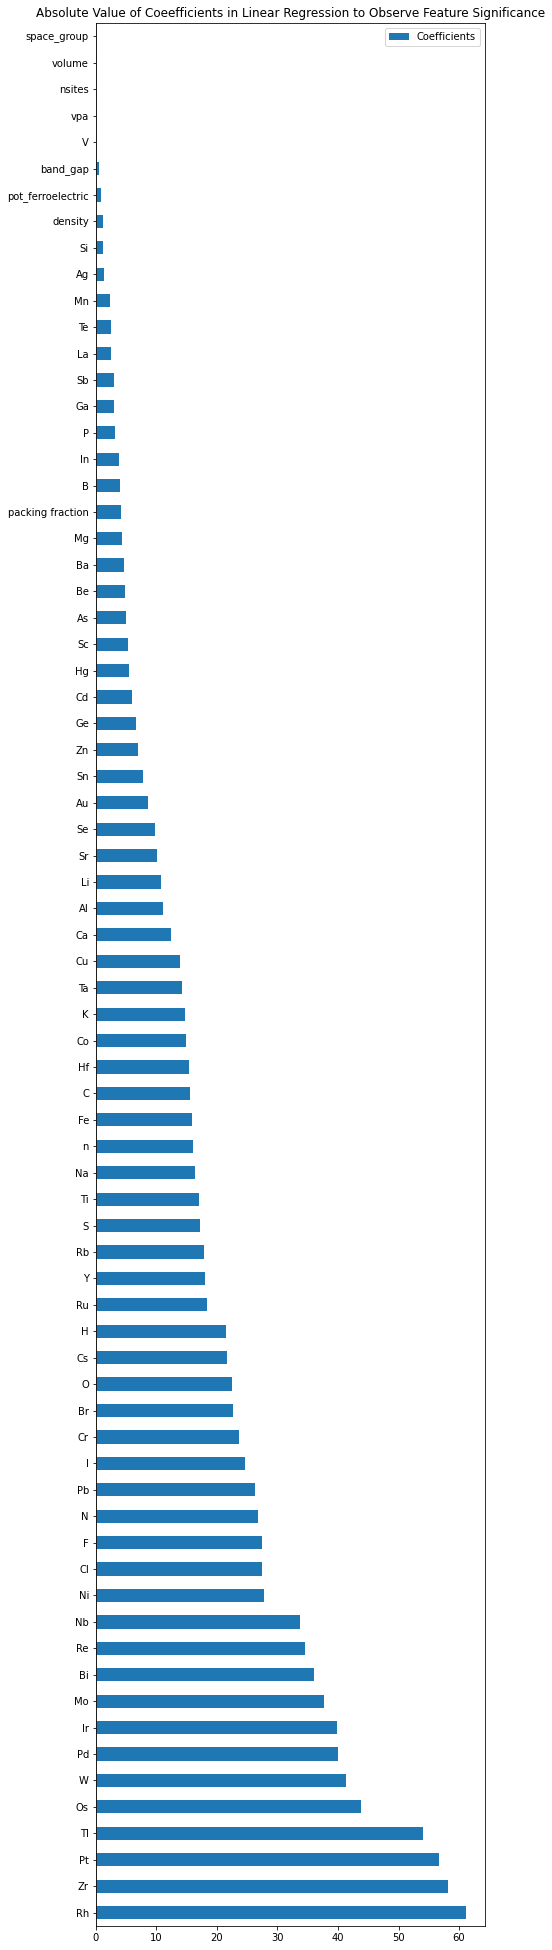

In [ ]:
import matplotlib.pyplot as plt

sorted_coefs.plot(kind="barh", figsize=(9, 35))
plt.title("Absolute Value of Coeefficients in Linear Regression to Observe Feature Significance")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)


Features with the smallest impact are: V, vpa, nsites, volume, space_group.

We will remove these faetures to improve the models.

In [ ]:
#drop ID and unimportant features
df = final_df.drop(columns=['material_id', 'V', 'vpa', 'nsites', 'volume', 'space_group'])
#Cast non-numeric data as integer
df["pot_ferroelectric"] = df["pot_ferroelectric"].astype(int)
for i in ['V', 'vpa', 'nsites', 'volume', 'space_group']:
  feature_list.remove(i)
print(feature_list)

['band_gap', 'n', 'pot_ferroelectric', 'H', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'K', 'Ca', 'Sc', 'Ti', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Cs', 'Ba', 'La', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'density', 'packing fraction']


####Train Test Split

In [ ]:
def train_test_split(dataframe, train_ratio, valid_ratio, test_ratio, tune_ratio=None):
    df_length = len(dataframe)

    # get train
    len_train = int(df_length * train_ratio)

    remaining1 = df_length - len_train

    # get valid
    len_valid = int(remaining1 * valid_ratio / (1 - train_ratio))

    remaining2 = remaining1 - len_valid

    # get test
    len_test = int(remaining2 * test_ratio / (1 - train_ratio - valid_ratio))

    if tune_ratio:
        
        # get tune
        len_tune = remaining2 - len_test

        # train test split
        train = df.iloc[:len_train,:]
        valid = df.iloc[len_train + 1:,:]

        test = valid.iloc[len_valid + 1:,:]
        valid = valid.iloc[:len_valid,:]
        
        tune = test.iloc[len_test + 1:,:]
        test = test.iloc[:len_test,:]

        return train, valid, test, tune
    
    else: 

        # train test split
        train = df.iloc[:len_train,:]
        valid = df.iloc[len_train + 1:,:]

        test = valid.iloc[len_valid + 1:,:]
        valid = valid.iloc[:len_valid,:]
        
        return train, valid, test

In [ ]:
def preprocess(df, step=False):
    if step:
        step = int(1 / step)

    # shuffle dataframe rows
    df.sample(frac=1, random_state=1)
    
    # split data
    train, valid, test, tune = train_test_split(df, 0.6, 0.2, 0.1, 0.1)

    # remove label from x
    x_train = train.drop(columns=['poly_total'])
    x_train = x_train.to_numpy()

    # get label
    y_train0 = train['poly_total'].values

    # turn to integers (0 decimal places)
    if step:
        # turn to integers (0 decimal places)
        y_train0 = np.array([int(i * step) for i in y_train0])

        # one hot encode
        y_train = np.zeros((len(y_train0), 300 * step))
        arg = np.arange(y_train0.size)
        y_train[arg, y_train0] = 1
    else:
        y_train0 = np.array([int(i) for i in y_train0])

        y_train = np.zeros((len(y_train0), 300))
        arg = np.arange(y_train0.size)
        y_train[arg, y_train0] = 1



    # same as train
    x_valid = valid.drop(columns=['poly_total'])
    x_valid = x_valid.to_numpy()
    y_valid0 = valid['poly_total'].values
    if step:
        y_valid0 = np.array([int(i * step) for i in y_valid0])
        y_valid = np.zeros((len(y_valid0), 300 * step))
        argv = np.arange(y_valid0.size)
        y_valid[argv, y_valid0] = 1
    else:
        y_valid0 = np.array([int(i) for i in y_valid0])
        y_valid = np.zeros((len(y_valid0), 300))
        argv = np.arange(y_valid0.size)
        y_valid[argv, y_valid0] = 1


    # same as train
    x_test = test.drop(columns=['poly_total'])
    x_test = x_test.to_numpy()
    y_test0 = test['poly_total'].values
    if step:
        y_test0 = np.array([int(i * step) for i in y_test0])
        y_test = np.zeros((len(y_test0), 300 * step))
        argvt = np.arange(y_test0.size)
        y_test[argvt, y_test0] = 1
    else:
        y_test0 = np.array([int(i) for i in y_test0])
        y_test = np.zeros((len(y_test0), 300))
        argvt = np.arange(y_test0.size)
        y_test[argvt, y_test0] = 1

    # same as train
    x_tune = tune.drop(columns=['poly_total'])
    x_tune = x_tune.to_numpy()
    y_tune0 = tune['poly_total'].values
    if step:
        y_tune0 = np.array([int(i * step) for i in y_tune0])
        y_tune = np.zeros((len(y_tune0), 300 * step))
        argvt = np.arange(y_tune0.size)
        y_tune[argvt, y_tune0] = 1
    else:
        y_tune0 = np.array([int(i) for i in y_tune0])
        y_tune = np.zeros((len(y_tune0), 300))
        argvt = np.arange(y_tune0.size)
        y_tune[argvt, y_tune0] = 1

    return x_train, y_train, x_valid, y_valid, x_test, y_test, x_tune, y_tune

In [ ]:
#Create 4 sets required for our final model
#STEP = 0.01
#x_train, y_train, x_valid, y_valid, x_test, y_test, x_tune, y_tune = preprocess(df, step=STEP)

# shuffle dataframe rows
df.sample(frac=1, random_state=1)
train, valid, test, tune = train_test_split(df, 0.6, 0.2, 0.1, 0.1)

#Combine sets for other initial models
train = np.concatenate((train, valid, tune), axis=0)
train = pd.DataFrame(train, columns = ['poly_total']+feature_list)

train_features = train.copy()
test_features = test.copy()

train_labels = train_features.pop('poly_total')
test_labels = test_features.pop('poly_total')

####Decision Tree

Score =  0.41261213467998115
Mean squared error [MSE] =  194.46491320754717
Root mean squared error [RMSE] =  13.945067701791453


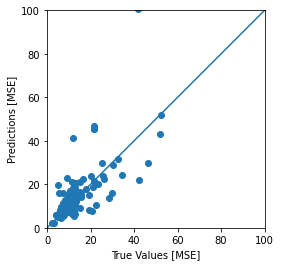

In [ ]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn import metrics
#Create and train a Decision Tree Regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
regressor.fit(train_features, train_labels)
test_pred = regressor.predict(test_features)

#Report model accuacy metrics
print("Score = ", regressor.score(test_features, test_labels))
print("Mean squared error [MSE] = ", metrics.mean_squared_error(test_labels, test_pred))
print("Root mean squared error [RMSE] = ", np.sqrt(metrics.mean_squared_error(test_labels, test_pred)))

#Plot model error
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_pred)
plt.xlabel('True Values [MSE]')
plt.ylabel('Predictions [MSE]')
lims = [0, 100]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


In [ ]:
#Visualize the final Decision Tree Regressor in a PDF
from sklearn.tree import export_graphviz 
import graphviz
dot_data = export_graphviz(regressor, out_file=None, feature_names=df.columns.values[1:])#, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('Decision Tree Regressor',view=True)

'Decision Tree Regressor.pdf'

####DNNs

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import pandas as pd
from sklearn.metrics import mean_squared_error
import random
import matplotlib.pyplot as plt
from matplotlib import style

style.use("ggplot")
random.seed(444)

In [ ]:
class model:
    
    # step is accuracy you want the model to go to
    # eg: 1 for integers, 0.1 for 1 decimal place, and 0.01 for 2 decimal places
    def __init__(self, number_of_features, dielectric_max_val, number_of_layers=False, filter=False, steps=False):
        self.number_of_features = number_of_features
        self.filter = filter
        self.number_of_layers = number_of_layers
        self.dielectric_max_val = dielectric_max_val
        self.steps = steps
        self.model = self.make_model()

    def make_model(self):
        model = Sequential()

        # if step is defined
        if self.steps:
            # input layer
            model.add(Dense(16, input_shape= (None, self.number_of_features), activation='relu'))

            # hidden layer/s
            if self.number_of_layers:
                for n in range(1, self.number_of_layers):

                    if self.filter:
                        model.add(Dense(self.filter, activation='linear'))
                    else:
                        model.add(Dense(32, activation='linear'))
            else:
                if self.filter:
                    model.add(Dense(self.filter, activation='linear'))
                else:
                    model.add(Dense(32, activation='linear'))

            model.add(Dropout(0.3))

            # output layer
            model.add(Dense(int(self.dielectric_max_val * 1 / self.steps), activation='linear'))

        else:
            # input layer
            model.add(Dense(16, input_shape=(None, self.number_of_features), activation='relu'))

            # hidden layer/s
            if self.number_of_layers:
                for n in range(1, self.number_of_layers):

                    if self.filter:
                        model.add(Dense(self.filter, activation='linear'))
                    else:
                        model.add(Dense(32, activation='linear'))
            else:
                if self.filter:
                    model.add(Dense(self.filter, activation='linear'))
                else:
                    model.add(Dense(32, activation='linear'))

            model.add(Dropout(0.3))
            
            # output layer
            model.add(Dense(self.dielectric_max_val, activation='linear'))

        # compile
        model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001))

        return model

    def fit_model(self, x_train, y_train, x_valid, y_valid):

        # suppress warnings
        tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

        # fit model
        self.model.fit(x=x_train, y=y_train, validation_data=(x_valid, y_valid), epochs=20, verbose=0)

    def predict(self, x_test, y_test=None, plot=False):

        # predict the test set
        y_predicted = self.model.predict(x_test)
        
        if plot:
            mse = mean_squared_error(y_test, y_predicted)
            rmse = np.sqrt(mse)
            print(f"Mean Squared Error = {mse}")
            print(f"Root Mean Squared Error(rmse) = {rmse}. The predicted dielectric constant is the actual dielectric constant +/- rmse")

            plt.plot(range(len(y_predicted)), np.argmax(y_test, axis=1), lw=0.8, color="blue", label="Actual Val")
            plt.plot(range(len(y_predicted)), np.argmax(y_predicted, axis=1), lw=0.8, color="red", label="Predicted Val")
            plt.legend()
            plt.show()
        else:
            return y_predicted
    
    def super_fit_predict(self, models_to_train, x_train, y_train, x_valid, y_valid, x_test, y_test=None, regression=False):

        list_of_values = []
        for m in range(models_to_train):

            self.fit_model(x_train, y_train, x_valid, y_valid)

            # predict 
            pred_values = self.predict(x_test)

            list_of_values.append(pred_values)

        final_value = np.mean(np.array(list_of_values), axis=0)

        # this weighs the values to mimic a regression result
        if regression:
            final_value = np.asarray([np.sum(i * index) for index, i in enumerate(final_value)])   

        if y_test is not None:

            if regression:
                y_test = np.argmax(y_test, axis=1)
                mse = mean_squared_error(y_test/100, final_value/100)

                rmse = np.sqrt(mse)
                print(f"Mean Squared Error = {mse}")
                print(f"Root Mean Squared Error(rmse) = {rmse}. The predicted dielectric constant is the actual dielectric constant +/- rmse")

                plt.plot(range(len(final_value)), y_test/100, lw=0.8, color="blue", label="Actual Val")
                plt.plot(range(len(final_value)), final_value, lw=0.8, color="red", label="Actual Val")
            
            else:
                mse = mean_squared_error(y_test, final_value)

                rmse = np.sqrt(mse)
                print(f"Mean Squared Error = {mse}")
                print(f"Root Mean Squared Error(rmse) = {rmse}. The predicted dielectric constant is the actual dielectric constant +/- rmse")

                plt.plot(range(len(final_value)), np.argmax(y_test, axis=1)/100, lw=0.8, color="blue", label="Actual Val")
                plt.plot(range(len(final_value)), np.asarray([np.argmax(i) for i in final_value])/100, lw=0.8, color="red", label="Actual Val")

            plt.show()
        
        else:
            final_value

    def save_model(self, filepath=None):
        if filepath:
            self.model.save(filepath)
        else:
            self.model.save('')

In [ ]:
def tune_model(x_train, y_train, x_valid, y_valid, x_tune, y_tune):
    
    HIDDEN_LAYERS_TO_TRY = 4
    FILTERS_TO_TRY = 3

    the_best_architectures = []
    filters = [2**i for i in range(5, 5 + FILTERS_TO_TRY)]

    for index, i in enumerate(x_tune):

        # convert one-hot to actual value
        value = np.argmax(y_tune[index])
        
        # difference between predicted value and actual value
        diff = []
        diff_dict = {}

        # for every parameter that will me altered
        for n in range(HIDDEN_LAYERS_TO_TRY):
            
            for filter in filters:
                model_now = model(67, 300, steps=STEP, number_of_layers=n, filter=filter)
                model_now.fit_model(x_train, y_train, x_valid, y_valid)

                # has to be in this format for the model to take it
                predict_this_x = np.asarray([i])

                # predict 
                exe = model_now.predict(predict_this_x, value)

                # get the value with the highest probability
                exe = np.argmax(exe)

                diff.append(exe - value)
                diff_dict[(n, filter)] = exe - value
        
        # get the "action" that gives the lowest difference between the predicted value and the actual value.
        the_best_architectures.append(np.argmin(diff))
        
    most_common_architecture = np.bincount(the_best_architectures).argmax()

    # get the architecture of the most common architecture
    diff_dict_keys = list(diff_dict.keys())
    BSEST_n, BEST_filter = diff_dict_keys[most_common_architecture]

    return BSEST_n, BEST_filter

In [ ]:
STEP = 0.01
x_train, y_train, x_valid, y_valid, x_test, y_test, x_tune, y_tune = preprocess(df, step=STEP)

Mean Squared Error = 3.7480695019893336e-05
Root Mean Squared Error(rmse) = 0.006122147909017989. The predicted dielectric constant is the actual dielectric constant +/- rmse


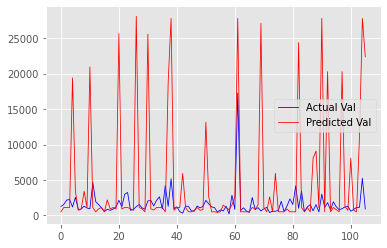

In [ ]:
# Basic Classification Model

classify = model(67, 300, steps=STEP)
classify.fit_model(x_train, y_train, x_valid, y_valid)
classify.predict(x_test, y_test, plot=True)

Mean Squared Error = 562.5688774068515
Root Mean Squared Error(rmse) = 23.71853447004792. The predicted dielectric constant is the actual dielectric constant +/- rmse


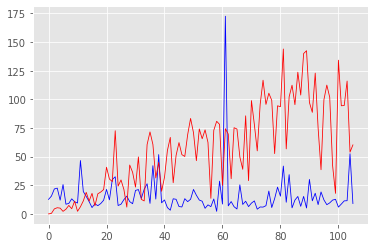

In [ ]:
# Basic Regression Model

regress = model(67, 300, steps=STEP)
regress.super_fit_predict(1, x_train, y_train, x_valid, y_valid, x_test, y_test, regression=True)

Mean Squared Error = 3.547336803448263e-05
Root Mean Squared Error(rmse) = 0.0059559523196952. The predicted dielectric constant is the actual dielectric constant +/- rmse


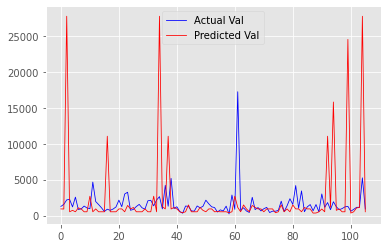

In [ ]:
# Tuned Classification Model

# This takes very long to run
BSEST_n, BEST_filter = tune_model(x_train, y_train, x_valid, y_valid, x_tune, y_tune)
tuned = model(67, 300, steps=STEP, number_of_layers=BSEST_n, filter=BEST_filter)
tuned.fit_model(x_train, y_train, x_valid, y_valid)
tuned.predict(x_test, y_test, plot=True)

Mean Squared Error = 3.344741513479649e-05
Root Mean Squared Error(rmse) = 0.0057833740268805455. The predicted dielectric constant is the actual dielectric constant +/- rmse


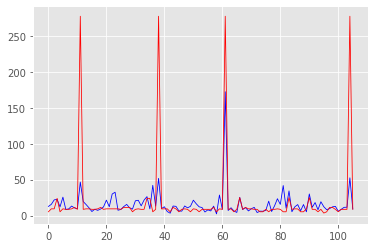

In [ ]:
# Super Tuned Classification Model

modelx = model(67, 300, steps=STEP, number_of_layers=BSEST_n, filter=BEST_filter)
modelx.super_fit_predict(24, x_train, y_train, x_valid, y_valid, x_test, y_test)